In [71]:
import numpy as np
import conductivity as sigma
from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import cm
import time as time

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.5)

figDirectory = "../figures/08302025_1/"
saveFigs = True

dataDirectory = "../data/08302025_1/"
saveData = True 


In [2]:
### Units 
K = 1. ### We measure temperature in units of Kelvin
GHz = .0479*K ### Frequencies in GHz 
ns = 1./GHz ### Time in ns
ps = 1.e-3 *ns ### ps 
nm = 1. ### Distance in nm

## $T_1$ measurements of flux noise at low temperature 

In [7]:
T = 4*K ### We consider low temperature measurements 
w = 2.83*GHz ### NV center frequency in GHz relevant for T1 measurements

nq = int(5e6) ### We need superduper resolution in the end 
qmax = 1000. ### Should be an order of magnitude larger than smallest z (inverse)
ntheta = 50 ### Should be a fine grid 

betas = np.array([0.05,1.35,2.3]) ### Different scattering length parameters 
nbetas = len(betas)
alpha_trs = np.zeros_like(betas) ### Transport time correction factors for each scattering range
tau_qps = np.zeros_like(betas)

ell_tr = 1.
tau_tr = 1.*ps ### We will fix the transport scattering time to be very short 



print("tau_tr: {t:0.4f} ps".format(t=tau_tr/ps))
print("T: {t:0.4f} K".format(t=T/K))
print("w: {w:0.4f} GHz".format(w=w/GHz))

print("w/T: {r:0.4f}".format(r=w/T))
print("w tau_tr: {r:0.4f}".format(r=w *tau_tr))
print("T tau_tr: {r:0.4f}".format(r=T*tau_tr))


nzs = 30
zs = np.logspace(-2,2,nzs)*ell_tr ### scan over two decades above and below transport length 

timers = np.zeros_like(betas)
noises = np.zeros((len(betas),nzs))

print("\n")
for i in range(len(betas)):
    u = lambda x : sigma.u_exp(x,betas[i]**2)
    alpha_trs[i] = 1./sigma.calc_tr(u)
    tau_qps[i] = tau_tr/alpha_trs[i]
    print("Scattering range: {beta:0.2f}".format(beta=betas[i]))
    print("Transport time correction factor: {alpha:0.4f}".format(alpha=alpha_trs[i]))
    print("tau_qp: {t:0.4f} ps".format(t=tau_tr/alpha_trs[i]/ps))
    print("ell_qp/ell_tr: {l:0.4f}".format(l=1./alpha_trs[i]))
    print("w tau_qp: {w:0.5f}".format(w=w/alpha_trs[i]))
    print("T tau_qp: {t:0.5f}".format(t=T*tau_tr/alpha_trs[i]))
    t0 = time.time()
    
    w_arr = [w/alpha_trs[i]] ### The frequecies should be passed as an array and in normalized to w tau_qp = w tau_tr/alpha 
    t = T/alpha_trs[i] ### We also need to normalize the temperature to units in T tau_qp = T tau_tr/alpha_tr 
    z_arr = zs*alpha_trs[i] ### We also normalize the distances in units of quasiparticle scattering times z /ell_qp = z/ell_tr *alpha 

    ### Now we compute the noise 
    noises[i,:] = sigma.flux_noise(w_arr,z_arr,t,u,nthetas = ntheta,nqs = nq,qmax=qmax)[:,0]

    t1 = time.time()
    timers[i] = t1-t0
    print("Calculation time: {dt}s".format(dt = t1-t0))
    print("\n")


tau_tr: 1.0000 ps
T: 4.0000 K
w: 2.8300 GHz
w/T: 0.0339
w tau_tr: 0.0028
T tau_tr: 0.0835


Scattering range: 0.05
Transport time correction factor: 1.0013
tau_qp: 0.9988 ps
ell_qp/ell_tr: 0.9988
w tau_qp: 0.13539
T tau_qp: 0.08340
Calculation time: 37355.148268699646s


Scattering range: 1.35
Transport time correction factor: 2.9973
tau_qp: 0.3336 ps
ell_qp/ell_tr: 0.3336
w tau_qp: 0.04523
T tau_qp: 0.02786
Calculation time: 38860.61600232124s


Scattering range: 2.30
Transport time correction factor: 9.9701
tau_qp: 0.1003 ps
ell_qp/ell_tr: 0.1003
w tau_qp: 0.01360
T tau_qp: 0.00838
Calculation time: 227808.5088186264s




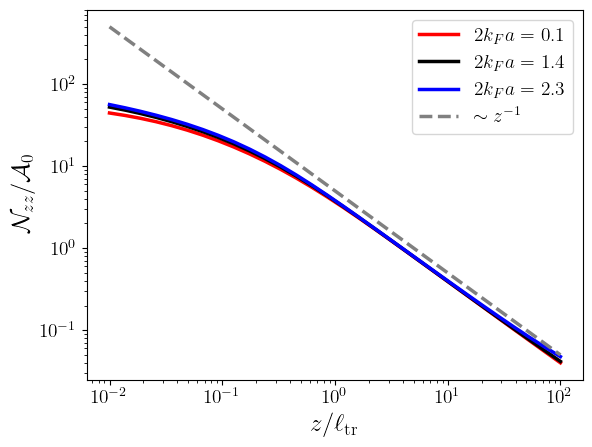

In [69]:
beta_color=['red','black','blue']

for i in range(len(betas)):
    plotlabel = r'$2k_F a= $ {b:0.1f}'.format(b=betas[i])
        
    plt.plot(zs,noises[i,:],label=plotlabel,color=beta_color[i] )

plt.plot(zs,5.*zs**-1,linestyle='dashed',color='gray',label=r'$\sim z^{-1}$')
plt.xlabel(r'$z/\ell_{\rm tr}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{A}_0$')

if saveFigs: plt.savefig(figDirectory+"noise_vs_z.pdf",bbox_inches='tight')
    
plt.show()

In [16]:
if saveData:
    np.save(dataDirectory+"noises.npy",noises)
    np.save(dataDirectory+"betas.npy",betas)
    np.save(dataDirectory+"zs.npy",zs)


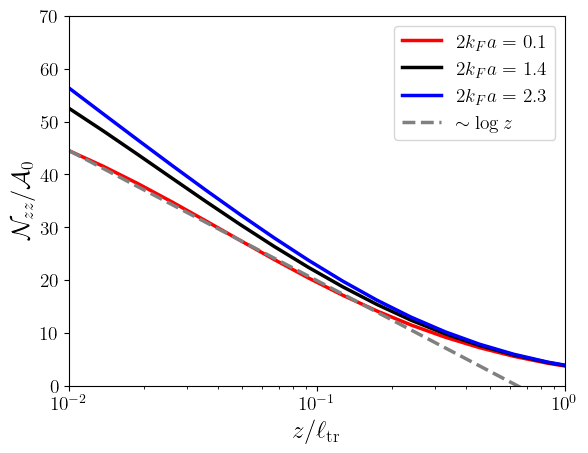

In [70]:
beta_color=['red','black','blue']

for i in range(len(betas)):
    plotlabel = r'$2k_F a= $ {b:0.1f}'.format(b=betas[i])
        
    plt.plot(zs,noises[i,:],label=plotlabel,color=beta_color[i] )

plt.plot(zs,-10.7*np.log(zs/0.64),linestyle='dashed',color='gray',label=r'$\sim \log z$')
plt.xlabel(r'$z/\ell_{\rm tr}$')
plt.ylim(0.,70.)
plt.legend()
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{A}_0$')
plt.xlim(1.e-2,1.e0)
if saveFigs: plt.savefig(figDirectory+"noise_vs_small_z.pdf",bbox_inches='tight')
    
plt.show()